In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
data = pd.read_csv(r"E:\MLP\Machine Learning\Both Classification and Regression\insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
data.shape

(1338, 7)

In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.sample(10)

,age,sex,bmi,children,smoker,region,charges
967,44,male,25.365,1,no,northwest,7518.02535
1119,30,female,19.950,3,no,northwest,5693.43050
1297,28,female,26.510,2,no,southeast,4340.44090
1264,49,female,33.345,2,no,northeast,10370.91255
128,32,female,17.765,2,yes,northwest,32734.18630
920,62,female,25.000,0,no,southwest,13451.12200
835,42,male,35.970,2,no,southeast,7160.33030
1059,32,male,33.820,1,no,northwest,4462.72180
442,18,male,43.010,0,no,southeast,1149.39590
1285,47,female,24.320,0,no,northeast,8534.67180


In [9]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

In [10]:
data.sample(10)

,age,sex,bmi,children,smoker,region,charges
1248,18,0,39.820,0,0,2,1633.96180
296,19,1,27.700,0,1,3,16297.84600
528,46,1,39.425,1,0,0,8342.90875
479,23,1,32.560,0,0,2,1824.28540
181,18,0,38.280,0,0,2,1631.82120
1290,38,0,19.950,2,0,0,7133.90250
1177,40,0,27.400,1,0,3,6496.88600
1337,61,0,29.070,0,1,1,29141.36030
1146,60,1,32.800,0,1,3,52590.82939
266,40,1,19.800,1,1,2,17179.52200


In [11]:
x = data.drop("charges", axis=1)
y = data["charges"]

In [12]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [13]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [16]:
dt = DecisionTreeRegressor(min_samples_split=5)
dt.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_split=5)

In [17]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

In [18]:
#Train Metrics
print(r2_score(y_pred_train,y_train))
print(mean_absolute_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_train,y_train))

0.9552316897684301
991.2156701531152
6336074.19990477


In [19]:
print(r2_score(y_pred_test,y_test))
print(mean_absolute_error(y_pred_test,y_test))
print(mean_squared_error(y_pred_test,y_test))

0.7844903962577694
2537.663854450871
30371866.59897462


Hyper-Parameter Tuning

In [20]:
param_grid = {
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 6],
    "criterion": ["squared_error", "friedman_mse"]
}
grid = GridSearchCV(dt,param_grid,cv=5,scoring='r2')

In [21]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(min_samples_split=5),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='r2')

In [22]:
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 20}
Best Score: 0.82635985523771


In [23]:
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=6, min_samples_split=20)

In [24]:
y_pred = best_model.predict(x_test)

In [28]:
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))

0.881088358320816
2322.781478949661
15630607.353047093


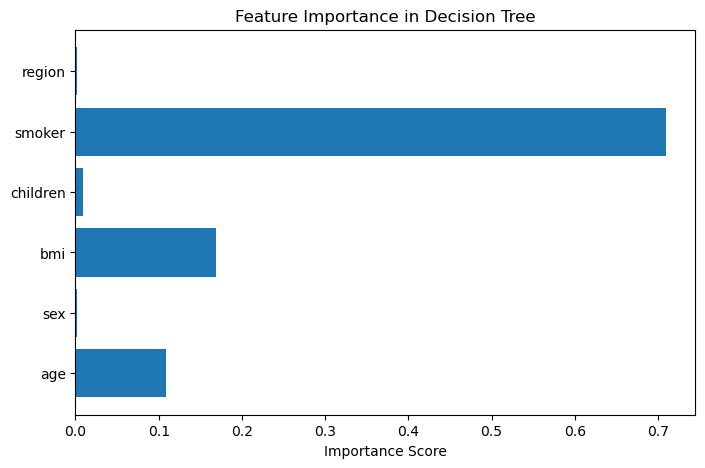

In [29]:
weights = best_model.feature_importances_
features = x.columns

plt.figure(figsize=(8,5))
plt.barh(features, weights)
plt.xlabel("Importance Score")
plt.title("Feature Importance in Decision Tree")
plt.show()


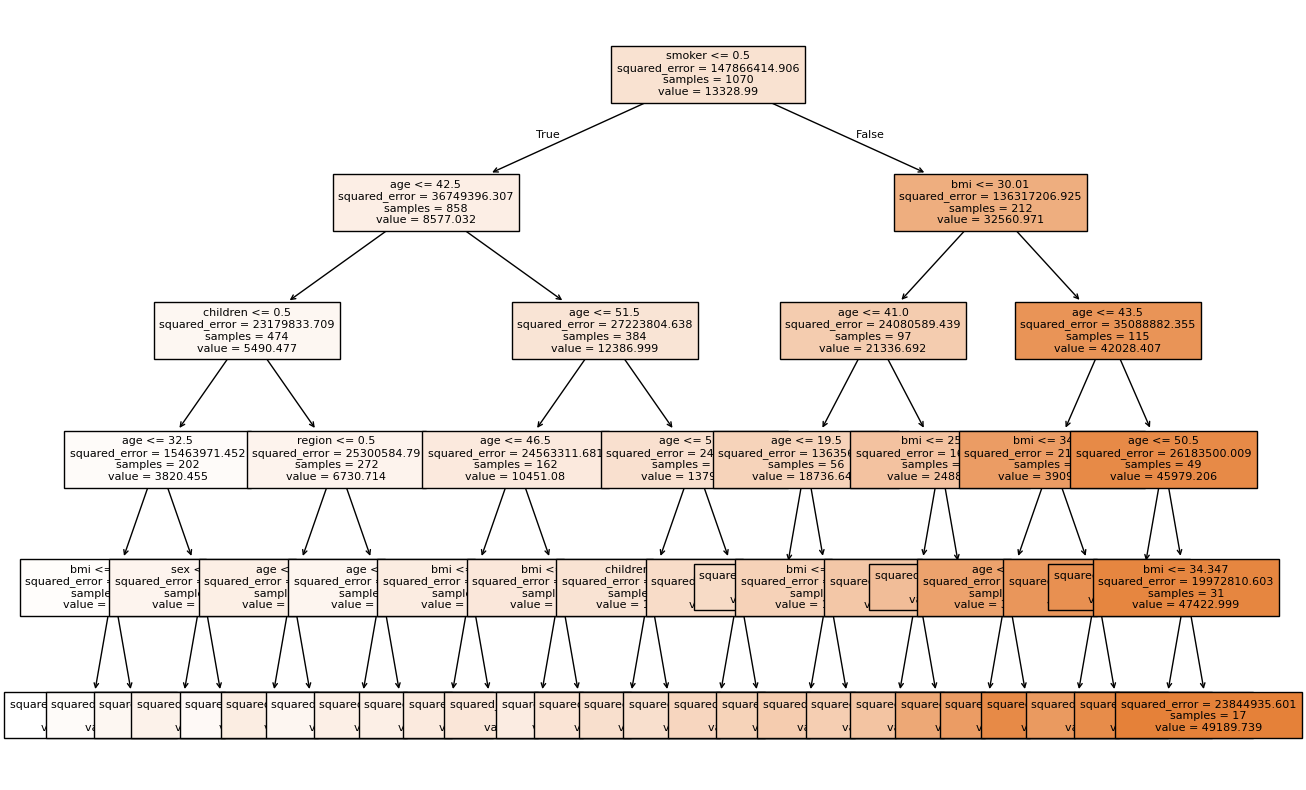

In [32]:
plt.figure(figsize=(15,10))
tree.plot_tree(
    best_model,
    feature_names=x.columns,
    filled=True,
    fontsize=8
)
plt.show()